Imports

In [86]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Tratamento inicial dos dados

In [87]:
# leitura do arquivo
df = pd.read_csv("Stock_TLKM_2005-2024.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-26,965.0,975.0,965.0,970.0,548.346130,84725000.0
1,2005-01-27,970.0,970.0,960.0,960.0,542.692932,134222500.0
2,2005-01-28,965.0,965.0,955.0,960.0,542.692932,100760000.0
3,2005-01-31,960.0,965.0,950.0,960.0,542.692932,137322500.0
4,2005-02-01,965.0,975.0,960.0,965.0,545.519531,69960000.0
5,2005-02-02,965.0,970.0,950.0,950.0,537.040039,103680000.0
6,2005-02-03,950.0,955.0,935.0,940.0,531.387024,125185000.0
7,2005-02-04,940.0,945.0,935.0,935.0,528.560364,66002500.0
8,2005-02-07,940.0,945.0,930.0,930.0,525.733948,48097500.0
9,2005-02-08,930.0,930.0,920.0,925.0,522.907166,60667500.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


In [89]:
# conversão da data para datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4705 non-null   datetime64[ns]
 1   Open       4704 non-null   float64       
 2   High       4704 non-null   float64       
 3   Low        4704 non-null   float64       
 4   Close      4704 non-null   float64       
 5   Adj Close  4704 non-null   float64       
 6   Volume     4704 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 257.4 KB


In [90]:
# vizualização da menor e da maior data
df['Date'].min(), df['Date'].max()

(Timestamp('2005-01-26 00:00:00'), Timestamp('2024-01-30 00:00:00'))

In [91]:
# exclusão de colunas desnecessárias e ordernação por data
cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    1
dtype: int64

In [92]:
# deleta valor nulo da coluna Close
df.dropna(subset=['Close'], inplace=True)
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [93]:
# define o campo de data como index
df = df.set_index('Date')
df.index

DatetimeIndex(['2005-01-26', '2005-01-27', '2005-01-28', '2005-01-31',
               '2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04',
               '2005-02-07', '2005-02-08',
               ...
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30'],
              dtype='datetime64[ns]', name='Date', length=4704, freq=None)

In [94]:
# organiza as datas por mês
y = df['Close'].resample('MS').mean()

In [95]:
y['2017':]

Date
2017-01-01    3936.818182
2017-02-01    3888.000000
2017-03-01    4018.636364
2017-04-01    4205.555556
2017-05-01    4378.000000
                 ...     
2023-09-01    3742.000000
2023-10-01    3695.909091
2023-11-01    3602.727273
2023-12-01    3928.947368
2024-01-01    3972.380952
Freq: MS, Name: Close, Length: 85, dtype: float64

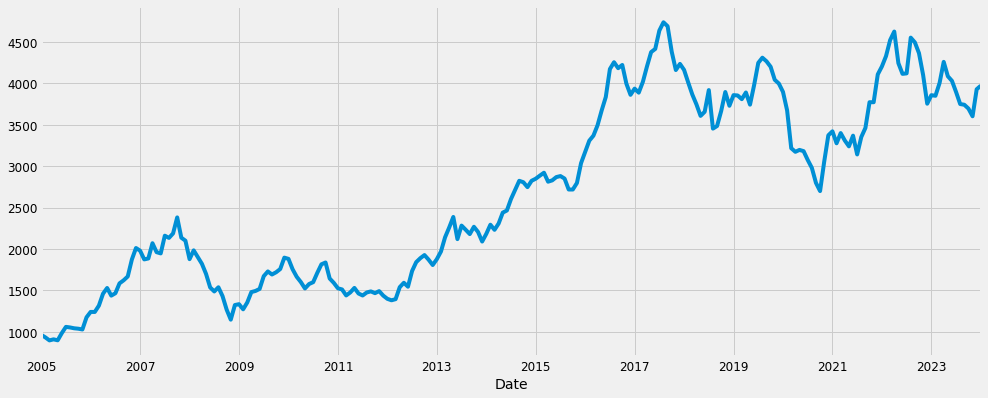

In [96]:
y.plot(figsize=(15, 6))
plt.show()

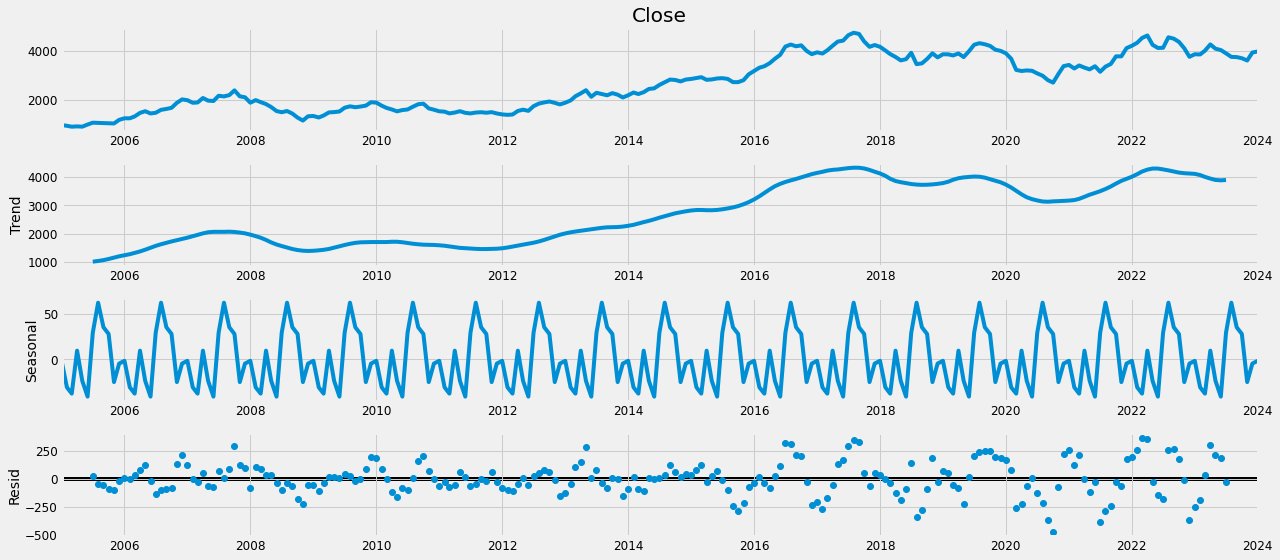

In [97]:
# decompõe a série de dados em três gráficos: tendência, sazonalidade e ruído
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Escolha dos valores para a função ARIMA e execução do modelo

In [98]:
# ARIMA usa ARIMA(p, d, q) para sazonalidade, tendência e ruído, abaixo segue exemplo dos valores
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [99]:
# valores da função e resultados, printados para comparar e escolher o menor AIC
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4285.845457746103
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3827.8080412513546
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3373.4505626834984
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3183.1539763731926
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3386.5571620024702
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3364.5811310402305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3199.408922430988
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3185.0588007254983
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3967.571244858268
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3542.8574866926
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3132.9318120162134
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2951.9336851154108
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3161.3281131832914
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3143.180405574585
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2981.666812680308
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2953.919106301132
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2889.5312223543688
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2748.4819244429723
A

In [100]:
# execução da função do modelo ARIMA com o menor valor encontrado 
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2009      0.067      2.978      0.003       0.069       0.333
ma.S.L12      -1.0000      0.079    -12.710      0.000      -1.154      -0.846
sigma2      1.919e+04    4.1e-06   4.68e+09      0.000    1.92e+04    1.92e+04


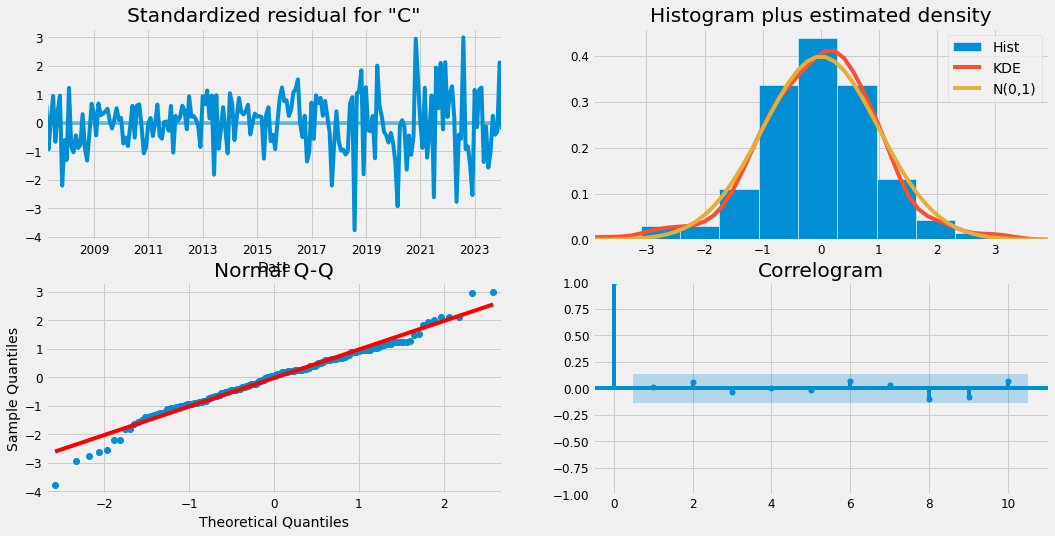

In [101]:
# execução do diagnóstico de modelo para identificar comportamento inesperado
results.plot_diagnostics(figsize=(16, 8))
plt.show()

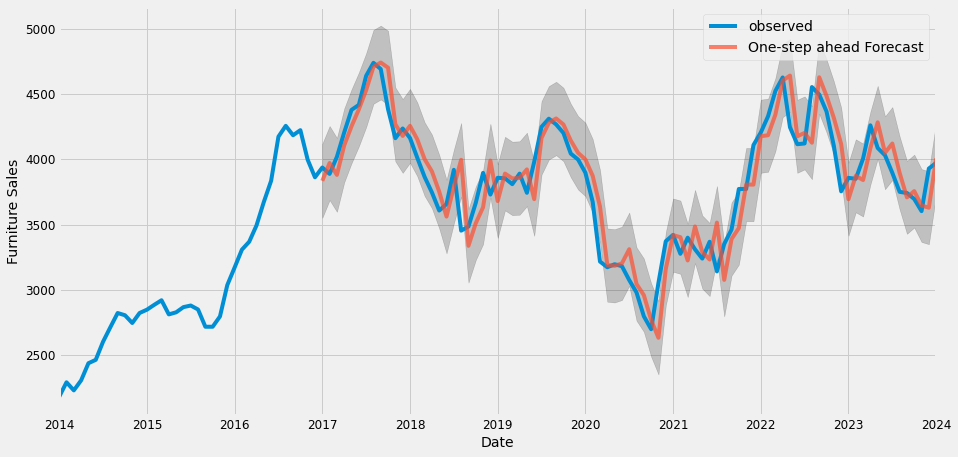

In [102]:
# validando o modelo, comparando o valor previsto com o histórico
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [103]:
# Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34326.84


In [104]:
# Root Mean Squared Error 
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 185.28


Produzir e vizualizar a previsão dos 12 meses

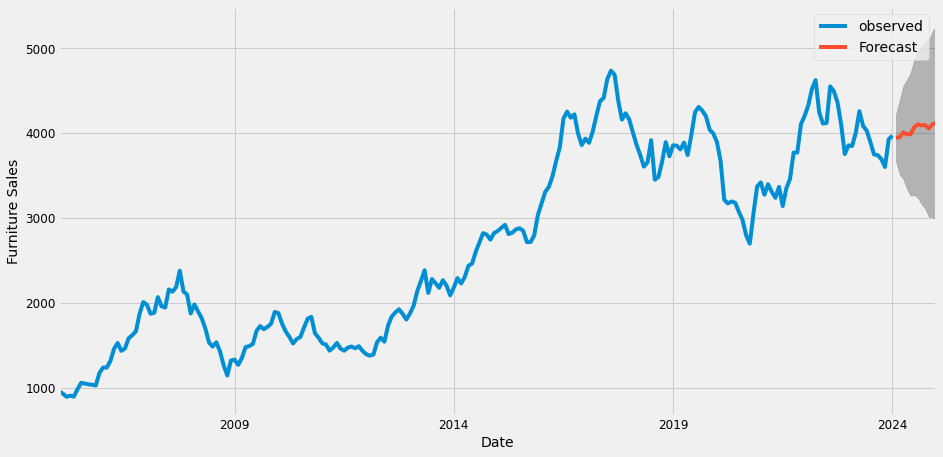

In [105]:
# plotar gráfico com histórico e previsão
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [106]:
# lista de valores previstos mensais
print(pred_uc.predicted_mean)

2024-02-01    3948.852402
2024-03-01    3952.183535
2024-04-01    4009.433603
2024-05-01    3988.837563
2024-06-01    3988.561040
2024-07-01    4070.253552
2024-08-01    4105.039225
2024-09-01    4092.155597
2024-10-01    4096.884993
2024-11-01    4056.101269
2024-12-01    4106.312581
2025-01-01    4124.808217
Freq: MS, Name: predicted_mean, dtype: float64


In [107]:
# lista de valores previstos mensais (minimos e maximos)
print(pred_ci)

            lower Close  upper Close
2024-02-01  3669.908308  4227.796496
2024-03-01  3516.598878  4387.768193
2024-04-01  3460.200275  4558.666932
2024-05-01  3345.735313  4631.939813
2024-06-01  3263.644659  4713.477421
2024-07-01  3271.863287  4868.643816
2024-08-01  3239.389025  4970.689426
2024-09-01  3164.107363  5020.203831
2024-10-01  3110.377629  5083.392358
2024-11-01  3014.410319  5097.792219
2024-12-01  3012.217852  5200.407309
2025-01-01  2980.708440  5268.907994
